In [3]:
import ray
from time import time
from matplotlib import pyplot as plt

from Quantum_functions import *
from QuantumPFunctions import *


from qutip import *
# Start Ray.
ray.init()



2020-03-26 14:13:07,718	WARNING services.py:586 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-03-26 14:13:07,733	INFO resource_spec.py:212 -- Starting Ray with 8.35 GiB memory available for workers and up to 4.2 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-26 14:13:08,045	INFO services.py:1078 -- View the Ray dashboard at localhost:8266


{'node_ip_address': '192.168.1.97',
 'redis_address': '192.168.1.97:20747',
 'object_store_address': '/tmp/ray/session_2020-03-26_14-13-07_717590_3235/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-03-26_14-13-07_717590_3235/sockets/raylet',
 'webui_url': 'localhost:8266',
 'session_dir': '/tmp/ray/session_2020-03-26_14-13-07_717590_3235'}

In [6]:
n = 7
state1 = tensor([basis(2,0)]*n)

alpha1 = Heisenberg1dRingGen(1,1,1,n)
alpha0 = lambda n,m,i,j: 0
beta1 = lambda n,i : [0,0,1][i]
beta0 = lambda n,i :0

self_interaction = hamiltonian(alpha1,beta0,n)
self_interaction = self_interaction/self_interaction.norm()
external_interaction = hamiltonian(alpha0,beta1,n)
external_interaction = external_interaction/external_interaction.norm()


perturbation: Qobj = make_hermitian(rand_unitary(2**n, dims = self_interaction.dims))
perturbation = perturbation/perturbation.norm()
epsilon = 0.3

H1 = epsilon*self_interaction + external_interaction + epsilon**2*perturbation
H2 = external_interaction
H3 = external_interaction + epsilon*perturbation

16384it [00:39, 419.93it/s]


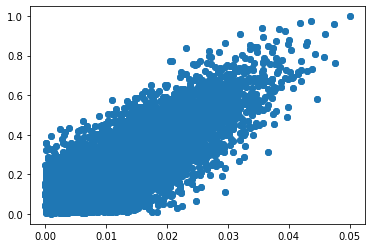

Finished executing completed in 39.072914123535156s


In [7]:
start = time()
xs,ys = energy_trace_comp_2d(H1,1,1)
end = time()

plt.scatter(xs,ys)
plt.show()
print(f"Finished executing completed in {end-start}s")

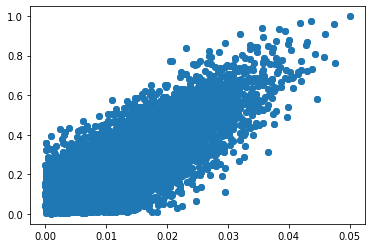

Finished executing completed in 5.1839988231658936s
4064


In [9]:
start = time()
xs,ys = energy_trace_compare_p(H1,1,1)
end = time()

plt.scatter(xs,ys)
plt.show()


print(f"Finished executing completed in {end-start}s")
print(len(xs[0]))